Name: Tanisha waghmare

---
PRN: 1032211031

---
Performed on 22/02/2024

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow
from google.colab.patches import cv2_imshow

In [ ]:
img1=cv2.imread('/content/mouse1.jpeg')
img2=cv2.imread('/content/mouse2.jpeg')

In [ ]:
img1

array([[[ 88, 113, 147],
        [ 88, 113, 147],
        [ 88, 113, 147],
        ...,
        [123, 109,  81],
        [124, 110,  82],
        [125, 111,  83]],

       [[ 89, 114, 148],
        [ 89, 114, 148],
        [ 89, 114, 148],
        ...,
        [125, 111,  83],
        [127, 113,  85],
        [129, 115,  87]],

       [[ 90, 115, 149],
        [ 90, 115, 149],
        [ 90, 115, 149],
        ...,
        [128, 114,  86],
        [131, 117,  89],
        [133, 119,  91]],

       ...,

       [[118, 144, 180],
        [118, 144, 180],
        [118, 144, 180],
        ...,
        [126, 148, 184],
        [127, 149, 185],
        [128, 150, 186]],

       [[105, 131, 167],
        [106, 132, 168],
        [106, 132, 168],
        ...,
        [125, 147, 183],
        [126, 148, 184],
        [127, 149, 185]],

       [[ 97, 123, 159],
        [ 96, 122, 158],
        [ 95, 121, 157],
        ...,
        [124, 146, 182],
        [125, 147, 183],
        [126, 148, 184]]

In [ ]:
img2

array([[[ 83,  66,  47],
        [ 80,  63,  44],
        [ 75,  58,  39],
        ...,
        [112, 137, 179],
        [112, 137, 179],
        [112, 137, 179]],

       [[ 78,  61,  42],
        [ 76,  59,  40],
        [ 72,  55,  36],
        ...,
        [112, 137, 179],
        [113, 138, 180],
        [113, 138, 180]],

       [[ 73,  56,  37],
        [ 72,  55,  36],
        [ 69,  52,  33],
        ...,
        [113, 138, 180],
        [114, 139, 181],
        [114, 139, 181]],

       ...,

       [[ 96, 120, 162],
        [100, 124, 166],
        [104, 128, 170],
        ...,
        [ 71,  78,  95],
        [ 68,  75,  92],
        [ 66,  73,  90]],

       [[ 95, 119, 161],
        [100, 124, 166],
        [105, 129, 171],
        ...,
        [ 71,  78,  95],
        [ 68,  75,  92],
        [ 66,  73,  90]],

       [[ 91, 115, 157],
        [ 95, 119, 161],
        [101, 125, 167],
        ...,
        [ 66,  73,  90],
        [ 66,  73,  90],
        [ 66,  73,  90]]

In [ ]:
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
img1 #check arrays to verify if its converted to grayscale

array([[ 93,  96, 101, ...,  65,  67,  68],
       [ 91,  94,  99, ...,  67,  68,  69],
       [ 88,  91,  96, ...,  69,  69,  70],
       ...,
       [103, 102, 102, ..., 166, 165, 165],
       [106, 105, 104, ..., 159, 158, 157],
       [108, 106, 105, ..., 160, 158, 156]], dtype=uint8)

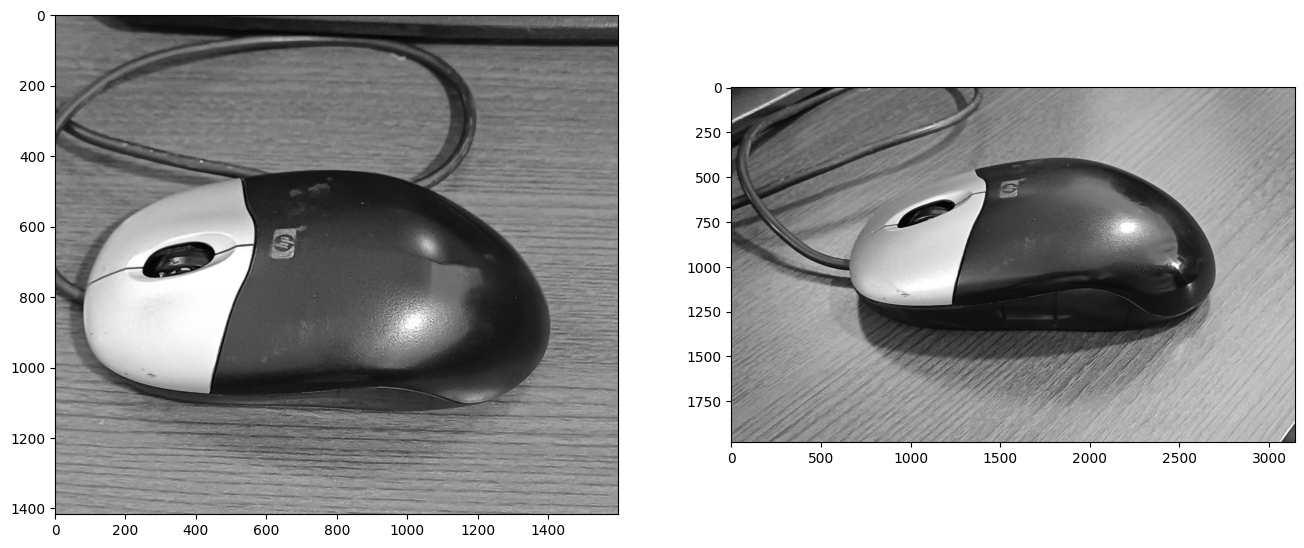

In [ ]:
figure, ax=plt.subplots(1,2, figsize=(16,8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [ ]:
sift=cv2.xfeatures2d.SIFT_create()

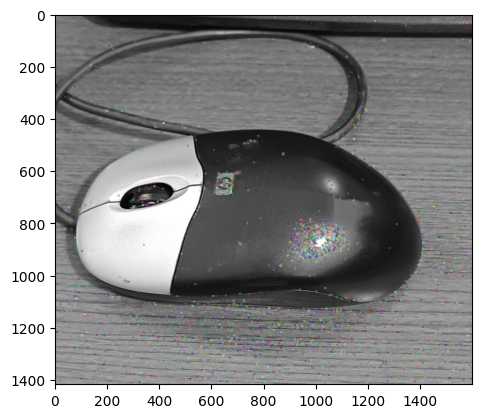

In [ ]:
keypoints_1, descriptors_1=sift.detectAndCompute(img1,None)
image1=cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(image1)

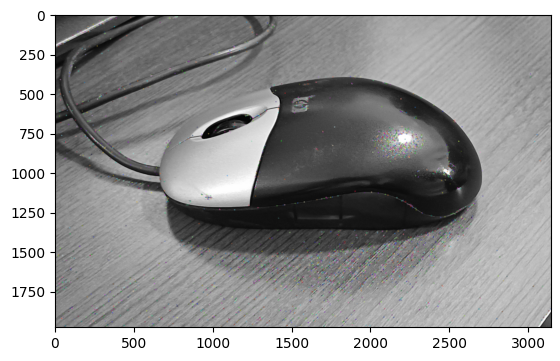

In [ ]:
keypoints_2, descriptors_2=sift.detectAndCompute(img2,None)
image2=cv2.drawKeypoints(img2,keypoints_2,img2)
plt.imshow(image2)

In [ ]:
len(keypoints_1), len(keypoints_2)

(3028, 3390)

In [ ]:
# Feature Matching
bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches=bf.match(descriptors_1, descriptors_2)

In [ ]:
matches=sorted(matches, key=lambda x:x.distance)

In [ ]:
len(matches)

577

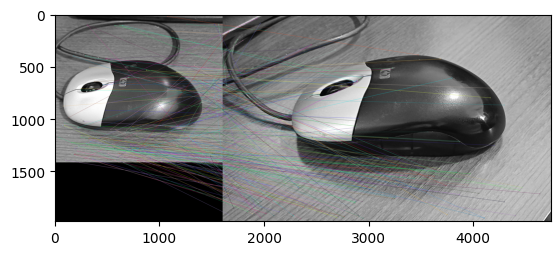

In [ ]:
img3=cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:200], img2, flags=2)
plt.imshow(img3)

In [ ]:
#extract matched keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2) #this extracts x,y coordinates of keypoints for img1
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [ ]:
# Perform perspective transformation
M,_=cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [ ]:
#Apply perspective transformation on first image
registered_image=cv2.warpPerspective(image1, M, dsize=(image2.shape[1], image2.shape[0]))  #img1 is getting transformed to be like 2

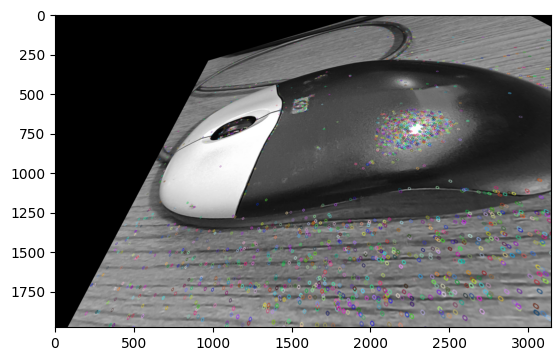

In [ ]:
#display registered image
plt.imshow(registered_image)

Text(0.5, 1.0, 'Registered Image')

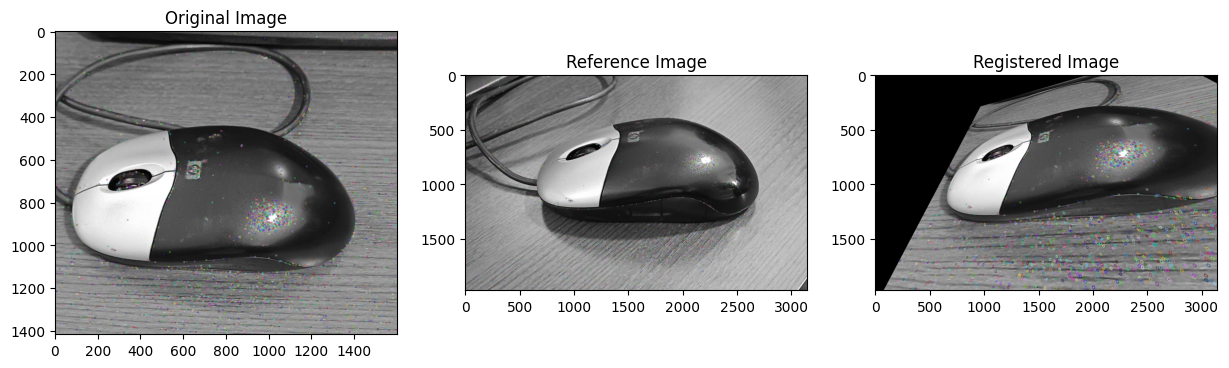

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 3, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('Registered Image')